In [ ]:
#import os
#os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.25"
import jax
import juniper as jp

from juniper import Gaussian
from juniper import LateralKernel

from juniper import NeuralField
from juniper import StaticGain
from juniper import DemoInput


from demo.demo2 import demo2

In [2]:
print("Computing devices found by JAX:")
print(jax.local_devices())

Computing devices found by JAX:
[CpuDevice(id=0)]


In [3]:
arch = jp.Architecture.get_arch()

In [4]:
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()
shape = (294, 447)

# Prepare Input
demo_input_0 = DemoInput("in0", {"shape":shape, "sigma":(30,30), "amplitude":0, "center": (0,40)})
demo_input_1 = DemoInput("in1", {"shape":shape, "sigma":(30,30), "amplitude":0, "center": (120,40)})
demo_input_2 = DemoInput("in2", {"shape":shape, "sigma":(30,30), "amplitude":0, "center": (240,40)})

# Prepare Neural Fields
exc_kernel = Gaussian({"sigma": (30,30), "amplitude": 12, "normalized": True})
inh_kernel = Gaussian({"sigma": (55,55), "amplitude": -9, "normalized": True})
nf_kernel = LateralKernel({"kernels": [exc_kernel, inh_kernel]})

nf0 = NeuralField("Attention Field", {"shape": shape, "resting_level": -5, "global_inhibition": -0.00025, "tau": 0.03,  "input_noise_gain": 0.5, "sigmoid": "AbsSigmoid", "beta": 100, "theta":0, "LateralKernel": nf_kernel})
nf1 = NeuralField("Action Field", {"shape": shape, "resting_level": -5, "global_inhibition": -0.00, "tau": 0.03,  "input_noise_gain": 0.1, "sigmoid": "AbsSigmoid", "beta": 100, "theta":0, "LateralKernel": nf_kernel})

# Static steps
st0 = StaticGain("st0", {"factor": 5})

# connections
demo_input_0 >> nf0
demo_input_1 >> nf0
demo_input_2 >> nf0
nf0 >> st0
st0 >> nf1

arch.compile()

Loading saved buffers...


<img src="demo/img/demo2_sketch.png" alt="demo sketch" width="400">

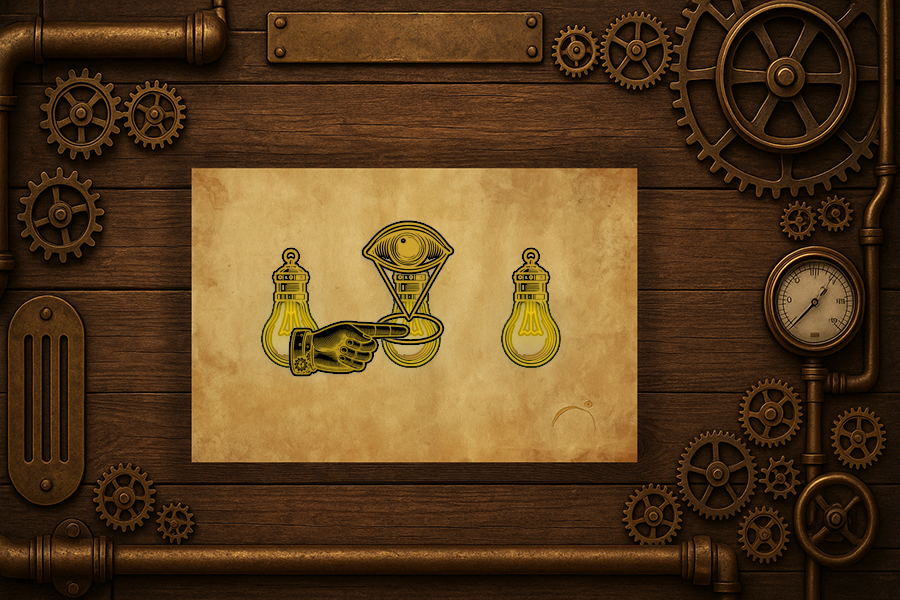

In [5]:
num_steps = 70
demo = demo2(arch, eye_field="Attention Field", hand_field="Action Field")
recording = demo.run(num_steps)

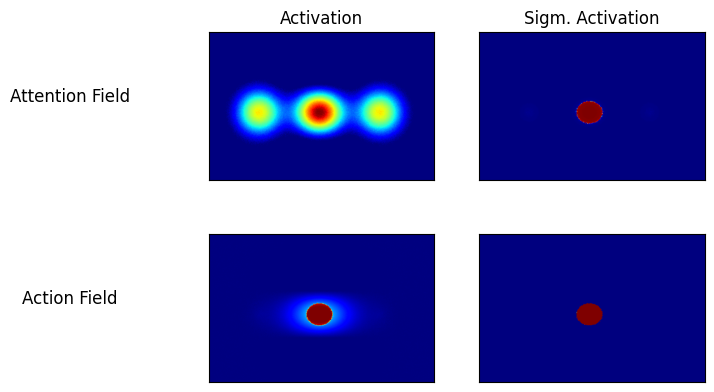

In [7]:
demo.plot()